In [2]:
import numpy as np
from sklearn.neighbors import LSHForest
import matplotlib.pyplot as plt
import itertools
import LSH
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets('MNIST_data', validation_size=10000)

In [3]:
## Satellite images below ###

In [4]:
from os import listdir
from os.path import isfile, join
import cv2
path = 'G:/Elliott/train_sm/'
files = [cv2.cvtColor(cv2.imread(path+f), cv2.COLOR_BGR2GRAY) for f in listdir('G:/Elliott/train_sm') if isfile(join('G:/Elliott/train_sm', f))]
files = files[:55]

def resize(images):
            
    shape = (150, 150)
    
    new_data = np.array([])
    for image in images:
        if image.shape == shape:
            new_data = np.append(new_data,np.asarray(image))
        else:
            new = cv2.resize(image, dsize=shape, interpolation=cv2.INTER_CUBIC)
            new_data = np.append(new_data, np.ravel(new))
            
    new_data = np.reshape(new_data, (len(images),shape[0]*shape[1]))

    return new_data


train_images = resize(files)


class images():
    
    def __init__(self,images,labels):
        self.images = images
        self.labels = labels
        
        
    def images(self, images):
        return self.images
    
    def labels(self):
        return self.labels
    
imgs_train = images(train_images, np.arange(len(train_images)))
# imgs_val = images(val_images, np.arange(len(val_images)))

print(imgs_train.images.shape)

(55, 22500)


c:\users\ellio\documents\miniconda3\lib\site-packages\sklearn\neighbors\approximate.py:220: DeprecationWarning: LSHForest has poor performance and has been deprecated in 0.19. It will be removed in version 0.21.
  DeprecationWarning)


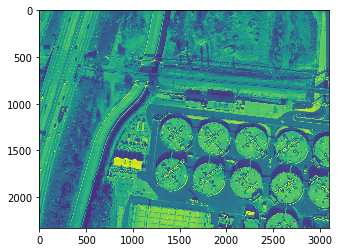

----------------------------
47


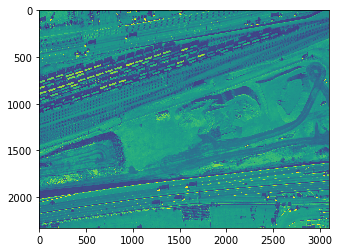

45


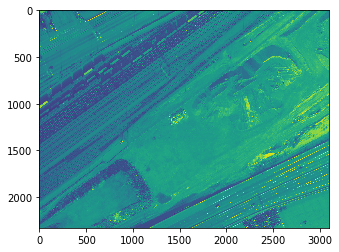

46


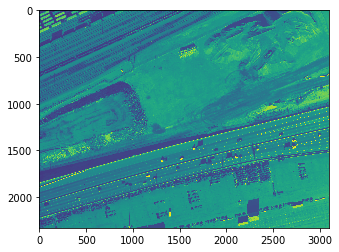

48


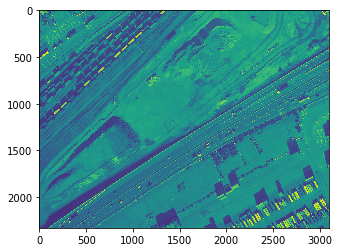

49


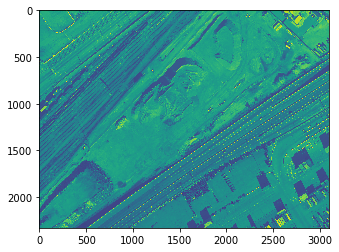

40


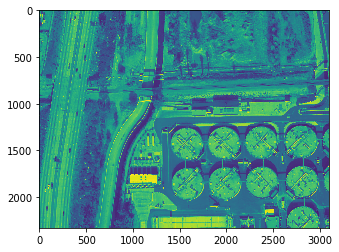

10


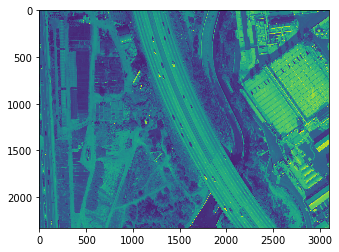

13


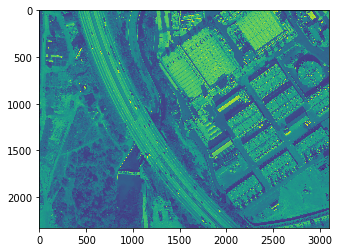

32


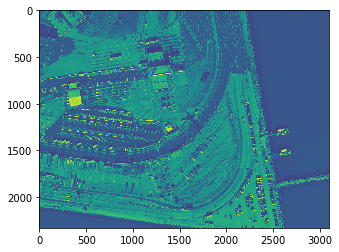

34


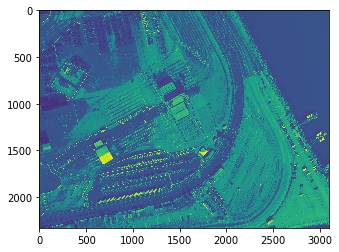

In [5]:
# Config holds the model parameter values for Grid Search
class config:
    train_points = 250
    val_points = 100
    
    parameters = {
        "n_neigh": [10, 20, 30],
        'n_est' : [50,100,150]}

# Initialise config and LSH model   
config = config()
LSH_ = LSH.LSH(None, None, None)


data = imgs_train.images
neighbours = 10

optimal_model = LSH_.fit_model(data, 150, 10)
indices = LSH_.predict(optimal_model, data, neighbours)


query = 41
plt.imshow(files[query])
plt.show()

print("----------------------------")
for i in indices[query]:
    print(i)
    plt.imshow(files[i])
    plt.show()



In [ ]:
### MNIST below here ###

In [ ]:
# Config holds the model parameter values for Grid Search
class config:
    train_points = 5000
    val_points = 1000
    
    parameters = {
        "n_neigh": [10, 20, 30],
        'n_est' : [50,100,150]}

# Initialise config and LSH model   
config = config()
LSH = LSH(mnist.train, mnist.validation, mnist.test)

# Optimise the model using 
max_accuracy, optimal_estimators, optimal_n_neighbours = LSH.optimise(config.train_points, config.val_points, config.parameters)
print(max_accuracy)

In [ ]:
data = mnist.validation.images[:1000]
neighbours = 10

# Return optimal model using data and optimal parameters
optimal_model = LSH.fit_model(data, optimal_estimators, optimal_n_neighbours)
# Return indices of predictions
indices = LSH.predict(optimal_model, data, neighbours)
# Return accuracy and error distribution
accuracy, positions = LSH.model_accuracy(indices, is_optimising = False)
# Plot error distributions
LSH.plot_bar_chart(positions, data.shape[0])